In [21]:
# Visualisation and Manipulation imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Performace Metric imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Model imports
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

In [41]:
data_raw = pd.read_pickle('raw_features.pkl')
data_raw.dropna(inplace=True)

In [43]:
X = data_raw.drop('Target_Comment_Volume', axis=1)
y = data_raw['Target_Comment_Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Defining the NN model
model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')   # single output for regression
])

# Training the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test set performance:")
print(f" MAE : {mae:.4f}")
print(f" MSE : {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R²  : {r2:.4f}")

Epoch 1/10
2766/2766 - 3s - 1ms/step - loss: 581.5434 - mae: 5.5619
Epoch 2/10
2766/2766 - 2s - 694us/step - loss: 483.8136 - mae: 4.7885
Epoch 3/10
2766/2766 - 2s - 545us/step - loss: 474.7204 - mae: 4.6626
Epoch 4/10
2766/2766 - 1s - 541us/step - loss: 459.0218 - mae: 4.6028
Epoch 5/10
2766/2766 - 2s - 558us/step - loss: 447.2707 - mae: 4.5801
Epoch 6/10
2766/2766 - 4s - 1ms/step - loss: 435.5132 - mae: 4.5921
Epoch 7/10
2766/2766 - 2s - 615us/step - loss: 420.4018 - mae: 4.5644
Epoch 8/10
2766/2766 - 2s - 726us/step - loss: 414.6403 - mae: 4.5602
Epoch 9/10
2766/2766 - 6s - 2ms/step - loss: 398.0373 - mae: 4.5241
Epoch 10/10
2766/2766 - 10s - 4ms/step - loss: 389.8541 - mae: 4.4658
692/692 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - loss: 398.5322 - mae: 4.3944
Test Loss: [469.11505126953125, 4.579994201660156]
692/692 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step
Test set performance:
 MAE : 4.5800
 MSE : 469.1152
 RMSE: 21.6591
 R²  : 0.6741


Mean Absolute Error (MAE): 4.76
Mean Squared Error (MSE): 745.61
                                       Target_Comment_Volume  \
Target_Comment_Volume                               1.000000   
Comments_Section_Off                                     NaN   
Hourly_Rate_CC1                                     0.745945   
Hourly_Rate_CC2                                     0.750005   
Hourly_Rate_CC3                                     0.104061   
Hourly_Rate_CC4                                     0.448838   
Category_Target_Mean                                0.151521   
Page_Popularity_Likes_Bin_Target_Mean               0.210265   
Page_Checkins_Bin_Target_Mean                       0.081555   
Page_Talking_About_Bin_Target_Mean                  0.275330   
Ratio_Agg_Past24h_vs_Future                         0.013033   

                                       Comments_Section_Off  Hourly_Rate_CC1  \
Target_Comment_Volume                                   NaN         0.745945   
Commen

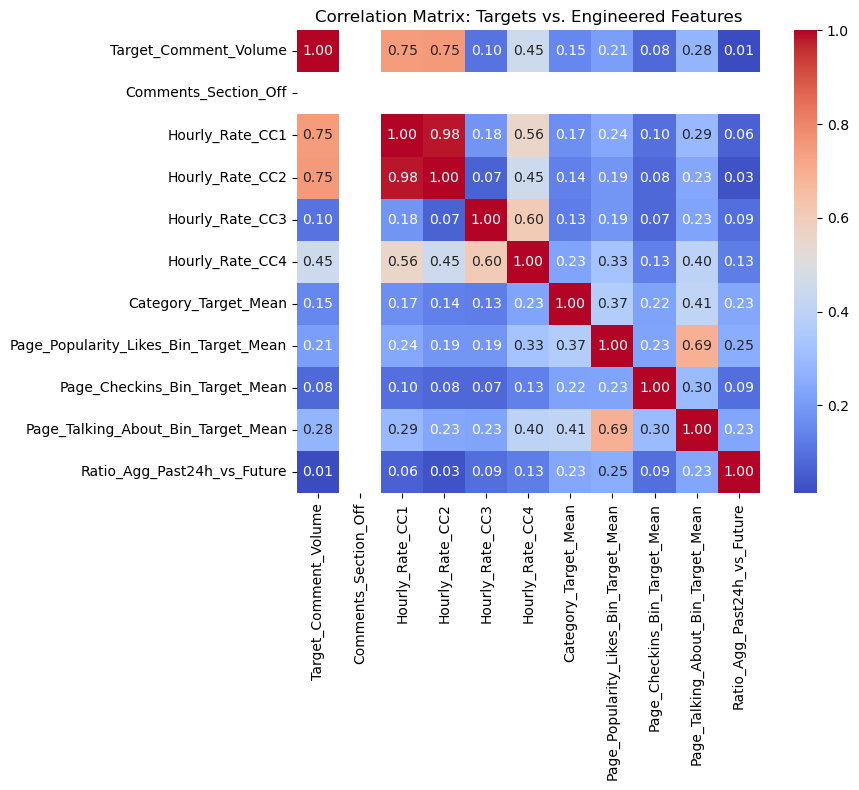

ValueError: Input y contains NaN.

ValueError: Input y contains NaN.

In [49]:
%run FeatureEngineering.ipynb

In [51]:
train_data = pd.read_csv("train_df.csv")
test_data = pd.read_csv("test_df.csv")

In [61]:
X_train = train_data.drop('Target_Comment_Volume', axis=1)
y_train = train_data['Target_Comment_Volume']
X_test = test_data.drop('Target_Comment_Volume', axis=1)
y_test = test_data['Target_Comment_Volume']

In [62]:
X_train = pd.get_dummies(
    X_train,
    columns=["Page_Category", "Post_Promotion_Status", "Published_Day", "BaseDate_Day"],
    drop_first=True
)

X_test = pd.get_dummies(
    X_test,
    columns=["Page_Category", "Post_Promotion_Status", "Published_Day", "BaseDate_Day"],
    drop_first=True
)

In [65]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [59]:
# 2. Standardize features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

# Defining the NN model
model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')   # single output for regression
])

# Training the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test set performance:")
print(f" MAE : {mae:.4f}")
print(f" MSE : {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R²  : {r2:.4f}")

Epoch 1/10
2766/2766 - 2s - 859us/step - loss: 535.4230 - mae: 5.6578
Epoch 2/10
2766/2766 - 2s - 597us/step - loss: 432.1028 - mae: 4.7855
Epoch 3/10
2766/2766 - 2s - 593us/step - loss: 409.4384 - mae: 4.6476
Epoch 4/10
2766/2766 - 2s - 573us/step - loss: 387.0364 - mae: 4.5773
Epoch 5/10
2766/2766 - 2s - 585us/step - loss: 373.9316 - mae: 4.4435
Epoch 6/10
2766/2766 - 2s - 584us/step - loss: 355.4035 - mae: 4.4201
Epoch 7/10
2766/2766 - 2s - 611us/step - loss: 339.0126 - mae: 4.3498
Epoch 8/10
2766/2766 - 2s - 662us/step - loss: 330.6499 - mae: 4.3009
Epoch 9/10
2766/2766 - 2s - 628us/step - loss: 308.4098 - mae: 4.2202
Epoch 10/10
2766/2766 - 2s - 572us/step - loss: 308.6495 - mae: 4.2078
692/692 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 467.7912 - mae: 4.4239
Test Loss: [433.6647033691406, 4.355923175811768]
692/692 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
Test set performance:
 MAE : 4.3559
 MSE : 433.6645
 RMSE: 20.8246
 R²  : 0.7041


In [77]:
# 2. Standardize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4. Define autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 32  # Dimension of the encoded representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# 5. Train the autoencoder ONLY on the training set
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=30, batch_size=32, verbose=2)

# 6. Encode features using the trained encoder
X_train_enc = encoder.predict(X_train_scaled)
X_test_enc = encoder.predict(X_test_scaled)

Epoch 1/30
2766/2766 - 2s - 872us/step - loss: 0.4367
Epoch 2/30
2766/2766 - 2s - 652us/step - loss: 0.2937
Epoch 3/30
2766/2766 - 2s - 643us/step - loss: 0.2757
Epoch 4/30
2766/2766 - 2s - 704us/step - loss: 0.2658
Epoch 5/30
2766/2766 - 2s - 670us/step - loss: 0.2615
Epoch 6/30
2766/2766 - 2s - 655us/step - loss: 0.2584
Epoch 7/30
2766/2766 - 2s - 668us/step - loss: 0.2553
Epoch 8/30
2766/2766 - 2s - 665us/step - loss: 0.2527
Epoch 9/30
2766/2766 - 2s - 684us/step - loss: 0.2543
Epoch 10/30
2766/2766 - 2s - 646us/step - loss: 0.2540
Epoch 11/30
2766/2766 - 2s - 648us/step - loss: 0.2511
Epoch 12/30
2766/2766 - 2s - 658us/step - loss: 0.2495
Epoch 13/30
2766/2766 - 2s - 641us/step - loss: 0.2503
Epoch 14/30
2766/2766 - 2s - 667us/step - loss: 0.2500
Epoch 15/30
2766/2766 - 2s - 646us/step - loss: 0.2487
Epoch 16/30
2766/2766 - 2s - 697us/step - loss: 0.2503
Epoch 17/30
2766/2766 - 2s - 661us/step - loss: 0.2456
Epoch 18/30
2766/2766 - 2s - 788us/step - loss: 0.2478
Epoch 19/30
2766/27

In [81]:
# Defining the NN model
model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train_enc.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')   # single output for regression
])

# Training the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.fit(X_train_enc, y_train, epochs=30, batch_size=32, verbose=2)


# Evaluate the model
loss = model.evaluate(X_test_enc, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test_enc)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f" MSE : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Epoch 1/30
2766/2766 - 2s - 746us/step - loss: 670.3918 - mae: 7.5084
Epoch 2/30
2766/2766 - 1s - 537us/step - loss: 555.5814 - mae: 6.4507
Epoch 3/30
2766/2766 - 1s - 530us/step - loss: 538.7825 - mae: 6.2891
Epoch 4/30
2766/2766 - 1s - 530us/step - loss: 523.3694 - mae: 6.2869
Epoch 5/30
2766/2766 - 1s - 531us/step - loss: 514.0673 - mae: 6.1140
Epoch 6/30
2766/2766 - 1s - 536us/step - loss: 505.8236 - mae: 6.0075
Epoch 7/30
2766/2766 - 2s - 544us/step - loss: 501.9927 - mae: 5.9652
Epoch 8/30
2766/2766 - 2s - 544us/step - loss: 494.8924 - mae: 5.7951
Epoch 9/30
2766/2766 - 2s - 577us/step - loss: 489.3824 - mae: 5.8166
Epoch 10/30
2766/2766 - 2s - 587us/step - loss: 492.5817 - mae: 5.8025
Epoch 11/30
2766/2766 - 1s - 539us/step - loss: 488.4953 - mae: 5.7384
Epoch 12/30
2766/2766 - 1s - 541us/step - loss: 483.6268 - mae: 5.5894
Epoch 13/30
2766/2766 - 2s - 552us/step - loss: 481.6414 - mae: 5.5771
Epoch 14/30
2766/2766 - 2s - 579us/step - loss: 476.7860 - mae: 5.5225
Epoch 15/30
276

In [101]:
train_data = pd.read_csv("train_df.csv")
test_data = pd.read_csv("test_df.csv")

In [147]:
X_train = train_data.drop(['Target_Comment_Volume'], axis=1)
y_train = train_data['Target_Comment_Volume']/train_data['H_Local']
X_test = test_data.drop(['Target_Comment_Volume'], axis=1)
y_test = test_data['Target_Comment_Volume']/test_data['H_Local']

In [149]:
X_train = pd.get_dummies(
    X_train,
    columns=["Page_Category", "Post_Promotion_Status", "Published_Day", "BaseDate_Day"],
    drop_first=True
)

X_test = pd.get_dummies(
    X_test,
    columns=["Page_Category", "Post_Promotion_Status", "Published_Day", "BaseDate_Day"],
    drop_first=True
)

In [151]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [153]:
# 2. Standardize features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

# Defining the NN model
model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')   # single output for regression
])

# Training the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=2)

# # Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test set performance:")
print(f" MAE : {mae:.4f}")
print(f" MSE : {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R²  : {r2:.4f}")

Epoch 1/30
2766/2766 - 2s - 778us/step - loss: 0.9001 - mae: 0.2725
Epoch 2/30
2766/2766 - 2s - 607us/step - loss: 0.7552 - mae: 0.2242
Epoch 3/30
2766/2766 - 2s - 565us/step - loss: 0.6865 - mae: 0.2110
Epoch 4/30
2766/2766 - 2s - 563us/step - loss: 0.6364 - mae: 0.2009
Epoch 5/30
2766/2766 - 2s - 577us/step - loss: 0.5901 - mae: 0.1894
Epoch 6/30
2766/2766 - 2s - 566us/step - loss: 0.5434 - mae: 0.1794
Epoch 7/30
2766/2766 - 2s - 563us/step - loss: 0.5334 - mae: 0.1739
Epoch 8/30
2766/2766 - 2s - 565us/step - loss: 0.4966 - mae: 0.1712
Epoch 9/30
2766/2766 - 2s - 569us/step - loss: 0.4903 - mae: 0.1679
Epoch 10/30
2766/2766 - 2s - 566us/step - loss: 0.4567 - mae: 0.1678
Epoch 11/30
2766/2766 - 2s - 562us/step - loss: 0.4495 - mae: 0.1657
Epoch 12/30
2766/2766 - 2s - 681us/step - loss: 0.4315 - mae: 0.1659
Epoch 13/30
2766/2766 - 2s - 577us/step - loss: 0.4356 - mae: 0.1642
Epoch 14/30
2766/2766 - 2s - 565us/step - loss: 0.3989 - mae: 0.1627
Epoch 15/30
2766/2766 - 2s - 564us/step - l

In [161]:
y_pred[:,0] = y_pred[:,0]*test_data['H_Local']
y_test = y_test*test_data['H_Local']

In [163]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test set performance:")
print(f" MAE : {mae:.4f}")
print(f" MSE : {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R²  : {r2:.4f}")

Test set performance:
 MAE : 116190.2397
 MSE : 227076187109.2249
 RMSE: 476525.1170
 R²  : -154956024.8089
